Movie recommendation system

In [39]:
import pandas as pd
import numpy as np

In [40]:
#User ratings dataframe
ratings=pd.read_csv("./ml-100k/u.data",sep="\t",names=["user_id","movie_id","rating","timestamp"])
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [41]:
#Movies dataframe
columns=["movie_id","title","release_date","video_release_date","imdb_url","unknown",
         "Action","Adventure","Animation","Children\'s","Comedy","Crime","Documentary",
         "Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi",
         "Thriller","War","Western"]
movies=pd.read_csv("./ml-100k/u.item",sep="|",names=columns,encoding='latin1')
print(movies.head())

   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1           1  ...        0          0       0        0

In [42]:
#Users dataframe
users=pd.read_csv("./ml-100k/u.user",sep="|",names=["user_id","age","gender","occupation","zip_code"])
print(users.head())

   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213


In [43]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None


In [44]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [45]:
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None


In [46]:
ratings.isnull().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [47]:
users.isnull().sum()

user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

In [48]:
movies.isnull().sum()

movie_id                 0
title                    0
release_date             1
video_release_date    1682
imdb_url                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [49]:
print(movies.loc[movies["release_date"].isnull()])

     movie_id    title release_date  video_release_date imdb_url  unknown  \
266       267  unknown          NaN                 NaN      NaN        1   

     Action  Adventure  Animation  Children's  ...  Fantasy  Film-Noir  \
266       0          0          0           0  ...        0          0   

     Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
266       0        0        0        0       0         0    0        0  

[1 rows x 24 columns]


In [50]:
print(movies[movies["title"]=="unknown"])
movies=movies[movies["title"]!="unknown"]
print("Removed movie with unknown title, genre and release date")

     movie_id    title release_date  video_release_date imdb_url  unknown  \
266       267  unknown          NaN                 NaN      NaN        1   

     Action  Adventure  Animation  Children's  ...  Fantasy  Film-Noir  \
266       0          0          0           0  ...        0          0   

     Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
266       0        0        0        0       0         0    0        0  

[1 rows x 24 columns]
Removed movie with unknown title, genre and release date


In [51]:
movies.drop(columns=["video_release_date"], inplace=True)   #remove video release date as all are null

In [52]:
print(movies.isnull().sum())

movie_id        0
title           0
release_date    0
imdb_url        2
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64


In [53]:
movies["imdb_url"]=movies["imdb_url"].fillna(value="none")   #Fill the missing url with a value none
movies.isnull().sum()

movie_id        0
title           0
release_date    0
imdb_url        0
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [54]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1681 entries, 0 to 1681
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      1681 non-null   int64 
 1   title         1681 non-null   object
 2   release_date  1681 non-null   object
 3   imdb_url      1681 non-null   object
 4   unknown       1681 non-null   int64 
 5   Action        1681 non-null   int64 
 6   Adventure     1681 non-null   int64 
 7   Animation     1681 non-null   int64 
 8   Children's    1681 non-null   int64 
 9   Comedy        1681 non-null   int64 
 10  Crime         1681 non-null   int64 
 11  Documentary   1681 non-null   int64 
 12  Drama         1681 non-null   int64 
 13  Fantasy       1681 non-null   int64 
 14  Film-Noir     1681 non-null   int64 
 15  Horror        1681 non-null   int64 
 16  Musical       1681 non-null   int64 
 17  Mystery       1681 non-null   int64 
 18  Romance       1681 non-null   int64 
 19  Sci-Fi     

In [55]:
movies["release_date"]=pd.to_datetime(movies["release_date"])
print(movies["release_date"].head())

0   1995-01-01
1   1995-01-01
2   1995-01-01
3   1995-01-01
4   1995-01-01
Name: release_date, dtype: datetime64[ns]


In [56]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1681 entries, 0 to 1681
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_id      1681 non-null   int64         
 1   title         1681 non-null   object        
 2   release_date  1681 non-null   datetime64[ns]
 3   imdb_url      1681 non-null   object        
 4   unknown       1681 non-null   int64         
 5   Action        1681 non-null   int64         
 6   Adventure     1681 non-null   int64         
 7   Animation     1681 non-null   int64         
 8   Children's    1681 non-null   int64         
 9   Comedy        1681 non-null   int64         
 10  Crime         1681 non-null   int64         
 11  Documentary   1681 non-null   int64         
 12  Drama         1681 non-null   int64         
 13  Fantasy       1681 non-null   int64         
 14  Film-Noir     1681 non-null   int64         
 15  Horror        1681 non-null   int64        

In [57]:
ratings[~ratings["movie_id"].isin(movies["movie_id"])]  #ratings for the movie that was removed

,user_id,movie_id,rating,timestamp
2172,130,267,5,875801239
3781,5,267,4,875635064
7245,268,267,3,875742077
12475,297,267,3,875409139
14756,319,267,4,875707690
15292,1,267,4,875692955
49295,532,267,3,875441348
93523,833,267,1,875655669
99723,422,267,4,875655986


In [58]:
ratings=ratings[ratings["movie_id"].isin(movies["movie_id"])]
ratings.loc[ratings["movie_id"]==267]   #Empty row means successful deletion of ratings for the deleted movie

,user_id,movie_id,rating,timestamp


In [59]:
ratings.drop('timestamp',axis=1,inplace=True)
ratings.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


Exploratory Data Analysis

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

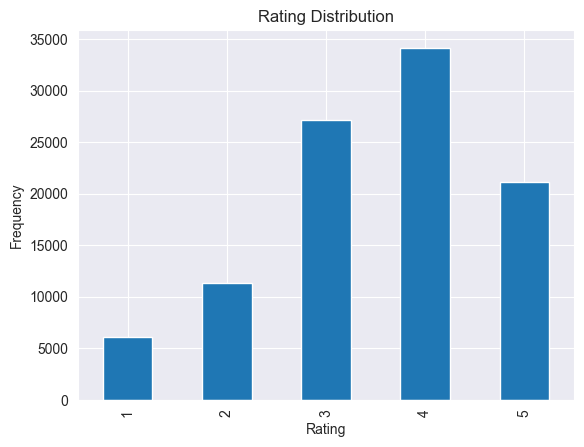

In [61]:
# Ratings distribution
ratings['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


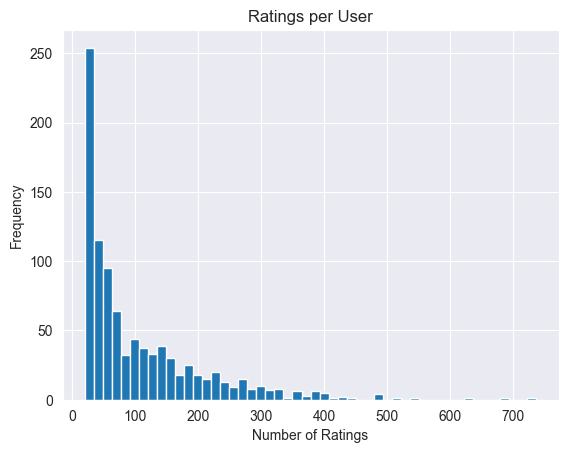

In [62]:
#Ratings per user
ratings_per_user = ratings.groupby('user_id').size().sort_index()
ratings_per_user.plot(kind='hist', bins=50)
plt.title('Ratings per User')
plt.xlabel('Number of Ratings')
plt.show()

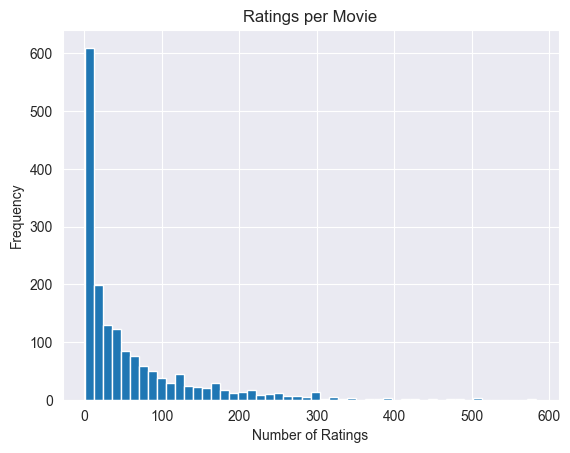

In [63]:
# Ratings per movie
ratings_per_movie = ratings.groupby('movie_id').size()
ratings_per_movie.plot(kind='hist', bins=50)
plt.title('Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.show()

In [64]:
# Basic statistics of ratings dataframe
print(ratings.isnull().sum())
print("*"*50)
print(ratings.info())
print("*"*50)
print(ratings.describe())

user_id     0
movie_id    0
rating      0
dtype: int64
**************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 99991 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   99991 non-null  int64
 1   movie_id  99991 non-null  int64
 2   rating    99991 non-null  int64
dtypes: int64(3)
memory usage: 3.1 MB
None
**************************************************
            user_id      movie_id        rating
count  99991.000000  99991.000000  99991.000000
mean     462.498305    425.544399      3.529868
std      266.612120    330.809824      1.125679
min        1.000000      1.000000      1.000000
25%      254.000000    175.000000      3.000000
50%      447.000000    322.000000      4.000000
75%      682.000000    631.000000      4.000000
max      943.000000   1682.000000      5.000000


In [65]:
print("Exploring the movies dataframe")
genre_columns=movies.columns[4:]
print("Genre columns => ",genre_columns)

Exploring the movies dataframe
Genre columns =>  Index(['unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')


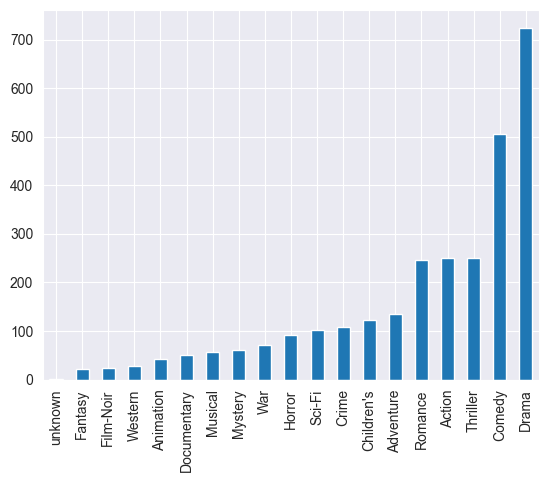

In [66]:
# Sum of movies in each genre (A movie can belong to several genre)
genre_counts = movies[genre_columns].sum().sort_values().plot(kind="bar")

In [67]:
# Load the ratings file
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])

ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


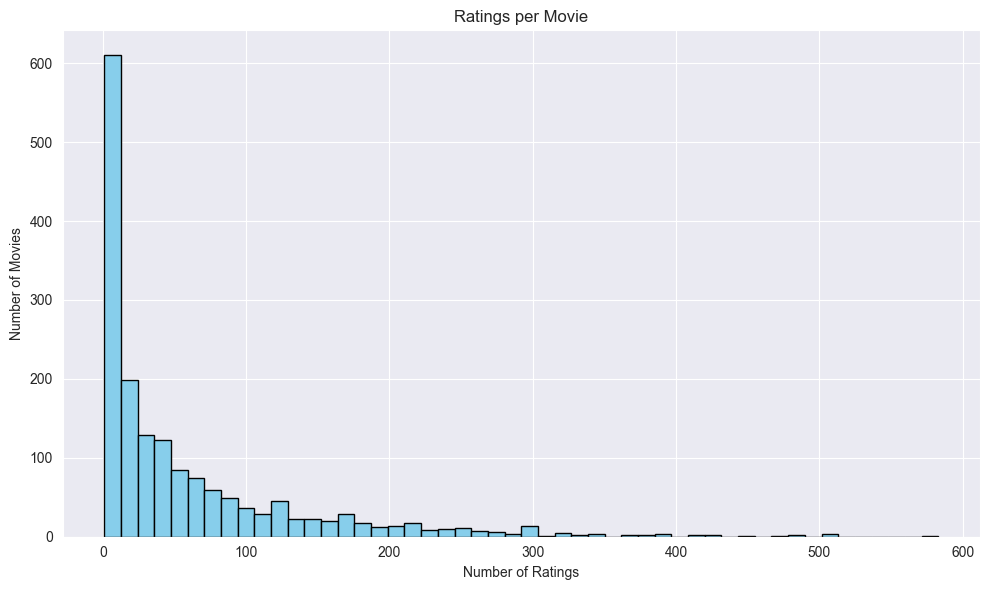

In [68]:
ratings_per_movie = ratings.groupby('movie_id').size()

plt.figure(figsize=(10,6))
ratings_per_movie.plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
movies = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', header=None, usecols=[0,1], names=['movie_id', 'title'])

# Join with ratings count
ratings_count = ratings.groupby('movie_id').size().reset_index(name='count')
top_movies = ratings_count.sort_values(by='count', ascending=False).head(10)

# Merge to get titles
top_movies = pd.merge(top_movies, movies, on='movie_id')
print(top_movies[['title', 'count']])


                           title  count
0               Star Wars (1977)    583
1                 Contact (1997)    509
2                   Fargo (1996)    508
3      Return of the Jedi (1983)    507
4               Liar Liar (1997)    485
5    English Patient, The (1996)    481
6                  Scream (1996)    478
7               Toy Story (1995)    452
8           Air Force One (1997)    431
9  Independence Day (ID4) (1996)    429


In [70]:
# Load ratings data
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])

In [71]:
# Load movie data (only movie_id and title)
movies = pd.read_csv(
    'ml-100k/u.item',
    sep='|',
    encoding='latin-1',
    header=None,
    usecols=[0, 1],
    names=['movie_id', 'title']
)

In [72]:
# Merge ratings with movie titles
merged_df = pd.merge(ratings, movies, on='movie_id')

# Show first few rows
merged_df.head()

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [73]:
top_rated = merged_df['title'].value_counts().head(10)
print(top_rated)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: count, dtype: int64


In [74]:
top_10 = merged_df['title'].value_counts().head(10)

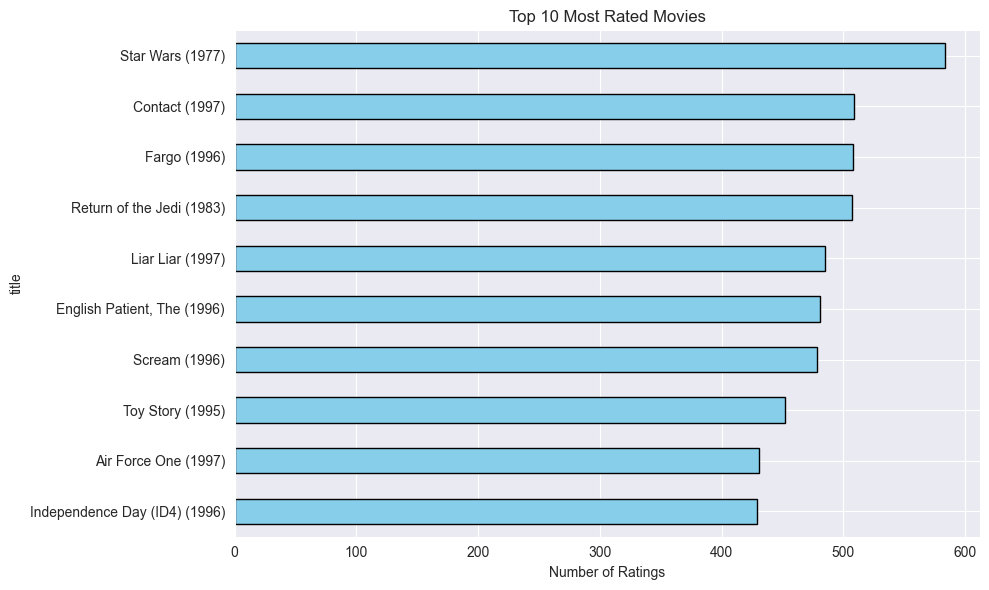

In [75]:
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Number of Ratings')
plt.title('Top 10 Most Rated Movies')
plt.gca().invert_yaxis()  # Most rated at top
plt.tight_layout()
plt.show()